In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import cifar100

### *The Output of the below cell shows that the model will use GPU for training and evaluating the testing set.*

In [55]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('\n'*3)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14562075686130885225
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1736599143
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5445840241157730149
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [56]:
# Dividing the data set into training and testing set
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


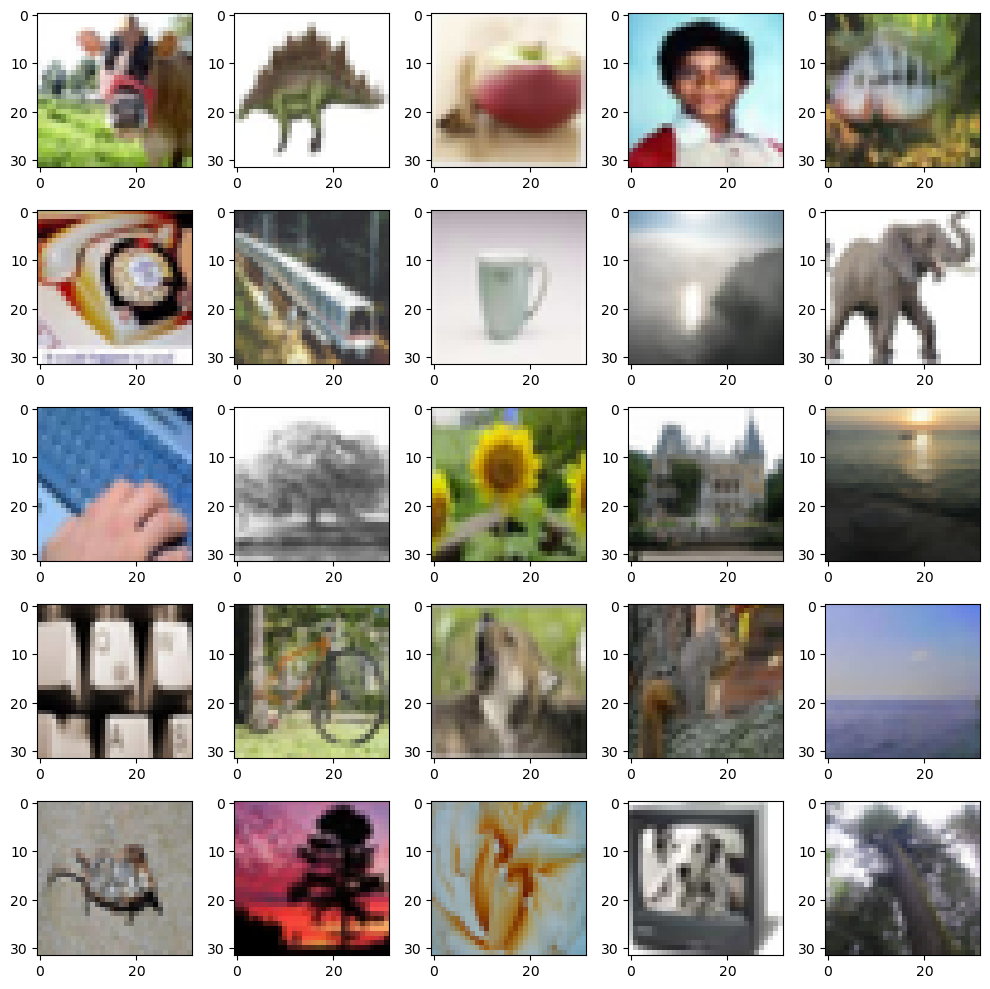

In [58]:
# First 25 images of the training set X_train
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
z = 0
for i in range(5):
    for j in range(5):
        axes[i,j].imshow(X_train[z])
        z += 1
plt.tight_layout()

In [59]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.layers import BatchNormalization
from keras.utils import np_utils

In [60]:
# Data Normalization of training and testing set of images
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [61]:
# One-hot encoding of training and testing set labels
y_train = np_utils.to_categorical(y_train, num_classes=100)
y_test = np_utils.to_categorical(y_test, num_classes=100)

In [62]:
# Creating a 2D convolution model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)       

In [63]:
# Fit the model and store it in a variable.
cifar_model = model.fit(X_train,y_train,batch_size=300,epochs=150,verbose=1)

Epoch 1/150
167/167 [==============================] - 10s 46ms/step - loss: 5.0374 - accuracy: 0.0176
Epoch 2/150
167/167 [==============================] - 7s 45ms/step - loss: 4.5089 - accuracy: 0.0307
Epoch 3/150
167/167 [==============================] - 7s 45ms/step - loss: 4.3775 - accuracy: 0.0404
Epoch 4/150
167/167 [==============================] - 8s 45ms/step - loss: 4.2756 - accuracy: 0.0521
Epoch 5/150
167/167 [==============================] - 7s 45ms/step - loss: 4.1785 - accuracy: 0.0615
Epoch 6/150
167/167 [==============================] - 7s 45ms/step - loss: 4.0747 - accuracy: 0.0778
Epoch 7/150
167/167 [==============================] - 8s 46ms/step - loss: 3.9815 - accuracy: 0.0903
Epoch 8/150
167/167 [==============================] - 8s 46ms/step - loss: 3.8998 - accuracy: 0.1012
Epoch 9/150
167/167 [==============================] - 8s 45ms/step - loss: 3.8230 - accuracy: 0.1130
Epoch 10/150
167/167 [==============================] - 8s 45ms/step - loss: 3.74

In [64]:
# Evaluate the model performance on testing data
score = model.evaluate(X_test, y_test)
print("Model loss for test data:", score[0])
print("Model accuracy for test data:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.6705 - accuracy: 0.5511
Model loss for test data: 1.6704814434051514
Model accuracy for test data: 0.5511000156402588


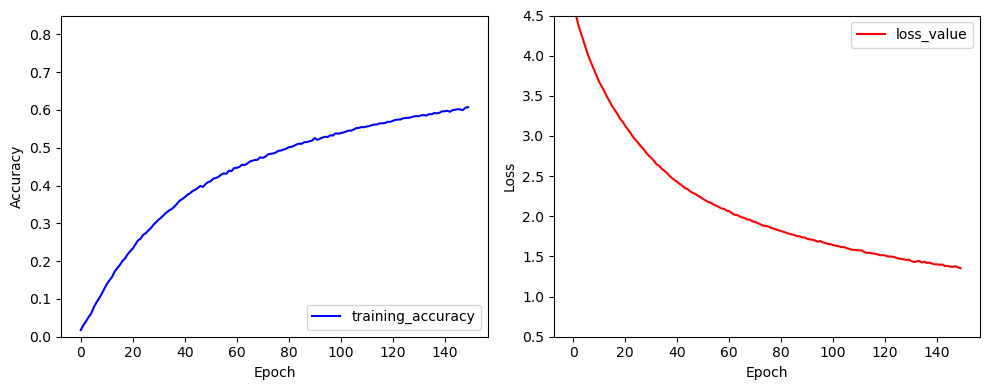

In [65]:
# Graph of Accuracy and Loss with the number of epochs

plt.rcParams["figure.figsize"] = [10,4]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot(1,2,1)
ax1.plot(cifar_model.history['accuracy'], label='training_accuracy', color='b')
ax1.set_ylim(0, 0.85)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc="lower right")

ax2 = plt.subplot(1,2,2)
ax2.plot(cifar_model.history['loss'], label='loss_value', color='r')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim(0.5,4.5)
ax2.legend(loc="upper right")

In [66]:

pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [67]:
# Actual labels of cifar100 dataset
str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [68]:
y_test.shape

(10000, 100)

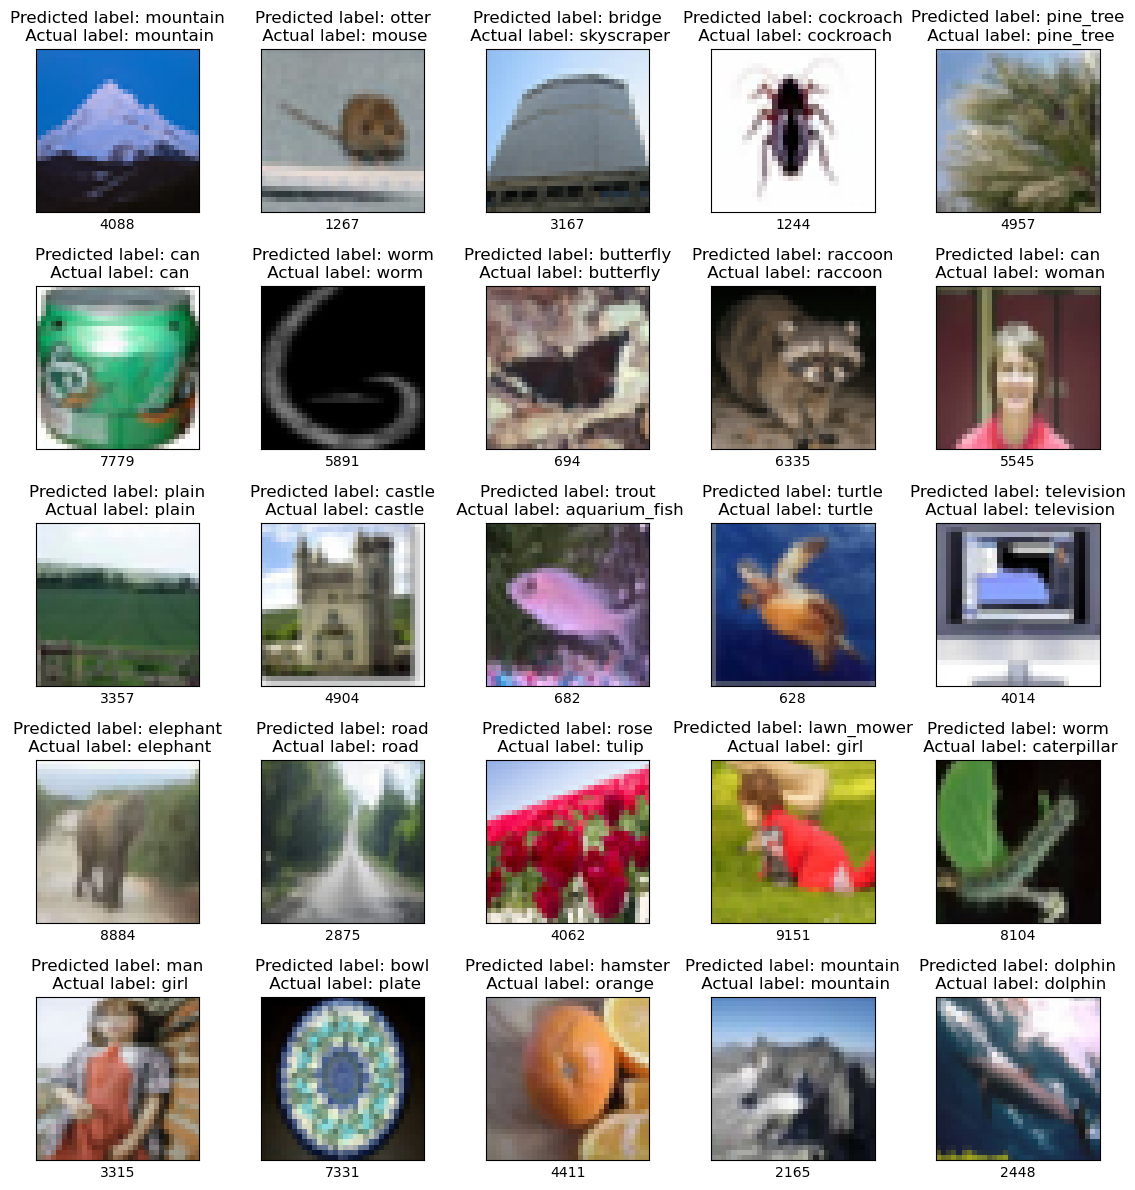

In [69]:
# 25 random results. Numbers on the X-axis represent the indices of the images in test data, that is X_test.
k = [i for i in np.random.randint(y_test.shape[0], size=(25))]
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    
    plt.imshow(X_test[k[i]])
    plt.title((f"Predicted label: {str_labels[pred[k[i]].argmax()]}\n Actual label: {str_labels[y_test[k[i]].argmax()]}"))
    plt.xlabel(k[i])
    plt.xticks([])
    plt.yticks([])
    # plt.axis('off')